## CS986 Team 5 
#### Blessing Adeyemi - 202173887, Ayola Jaiyesimi - 202193845 , Mohammed Ansari - 202182357 , Sunilkamar Jambagi - 202162237.

Project Objective
----------
The project objective was to predict the popularity score of a song, which constitutes a regression problem. The training and test datasets comprised of several songs and features which could be used to predict the popularity. To begin the project, data cleaning and preprocessing was done before any analysis.

The primary packages used for the course of the project are scikit-learn, pandas, matplotlib and numpy.

Solution Process
---------------
The first steps involved preprocessing of data to clean the data and extract null values. The correlation between attributes and the target attribute was observed. As there was no high correlation between features and the target variable, the categorical variables were dropped. Some features had outliers and this guided our model selection process.

Afterwards, the training process began. Our baseline model was built and fit to data and this served as a comparison metrices for other models. Other models were trained and set with different hyperparameters to determine how well they performed. Depending on the model, the scaled train value was passed as input. This was also checked to ensure that models were not overfitting/ underfitting to the given training data. We further explored feature importance, feature reduction and hyperparameter tuning to improve the performance of our models.

Final Model Selection Process
--------
Several models and variations/ combinations of models were built. The top three models include:
- Linear Regression: As the goal was to predict continuous values, we used this as a performance measuring index and this served as our baseline model.
- Random Forest: The Random Forest model was the highest performing single estimator. This also motivated it's use in several ensemble learning methods combined with other estimators.
- Ensemble method: This involved the combination of several models which are individaully trained and the predictions are averaged to give a final prediction. This could complement models that are weak on their own.
- GradientBoost: This was chosen because it is an ensemble method that improves its prediction that tries to fit estimators to the residuals of the previous estimator.

The final model was selected after comparison with the baseline model and its performance on both the train and test set. This was GradientBoost which achieved the lowest test RMSE and the second-to-the-lowest train RMSE. This is attributed to how the model works and learns. Each subsequent model aims to predict errors from the previous models. This results in a more robust model which is less sensitive to outliers. The details for selection are explained in the course of the report.

### Section 1 - Data Preprocessing

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA

In [134]:
# Utility functions
def cross_validate(model, X, y, k):
    scores = cross_val_score(model, X, y, cv=k, scoring='neg_root_mean_squared_error')
    mean_scores = scores.mean()
    return (abs(scores), abs(mean_scores))

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [131]:
# To get an accurate representation of how our various models are performing, the train-test split was not enough 
# to give a full depiction of this. This is because when we split our training dataset into two, the number of 
# instances that can be trained on are reduced and so the results depend largely on the random instances that were 
# trained and tested. Hence, we used cross validation to mitigate this and get a better performance estimate.

# FUNCTIONS DEFINITION
# This defines the following parameters across all models
    """
    :param X: the [pandas] dataset feature features 
    :param y: the target values for the dataset X
    :param k: a hyperparameter specifying how many folds to use for cross validation
    :return: a tuple of the model after fitting the data and also the average rmse. The average rmse is itself a 
    :tuple of the k rmse's and the final average rmse respectively
    """ 

def perform_linear_regression(X, y, k = 10):
#     This function performs linear regression on a dataset.
    linear_regression = LinearRegression()
    avg_rmse = cross_validate(linear_regression, X, y, k)
    linear_regression.fit(X,y)

    return (linear_regression, avg_rmse)

def perform_sgd(X, y, k = 10):
#   This function performs SGD regression on a dataset.
    sgd_regression = SGDRegressor()
    avg_rmse = cross_validate(sgd_regression, X, y, k)
    sgd_regression.fit(X,y)
    
    return (sgd_regression, avg_rmse)

def perform_random_forest(X, y, k = 10,**kwargs):
#   This function performs random forest regression on a dataset.
    rf_regression = RandomForestRegressor(**kwargs)
    avg_rmse = cross_validate(rf_regression, X, y, k)
    rf_regression.fit(X,y)

    return (rf_regression, avg_rmse)

def perform_ensemble(X, y, model1, model2, k = 10):
    """
    This function performs regression using an ensemble model of two models on a dataset.

    :param model1: the first model in the ensemble classifier
    :param model2: the first model in the ensemble classifier
    : **kwargs: arguments for the RandomForest regressor model
    """ 
    voting_regression = VotingRegressor(estimators=[('rf', model1), ('dt', model2)])
    avg_rmse = cross_validate(voting_regression, X, y, k)
    voting_regression.fit(X, y)
    
    return (voting_regression, avg_rmse)

def perform_gradientboost(X,y, k=10, **kwargs):
#   This function performs Gradient Boost on a dataset 
    gradient_boost = GradientBoostingRegressor(**kwargs)
    avg_rmse = cross_validate(gradient_boost, X, y, k)
    gradient_boost.fit(X,y)

    return (gradient_boost, avg_rmse)

In [3]:
# Importing the train set
spotify_data = pd.read_csv("/Users/admin/CS98XRegressionTrain.csv")

In [4]:
# The first steps involved importing the data and checking for null values. It was observed that there were 
# 453 instances and 15 attributes, with only one attribute ("top genre") having a total of 15 missing values. 

# Observing data features
spotify_data.shape

(453, 15)

In [6]:
# Checking the datatype and null value inspection
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [7]:
spotify_data.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [8]:
# Viewing the statistical aspect of the data
spotify_data.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


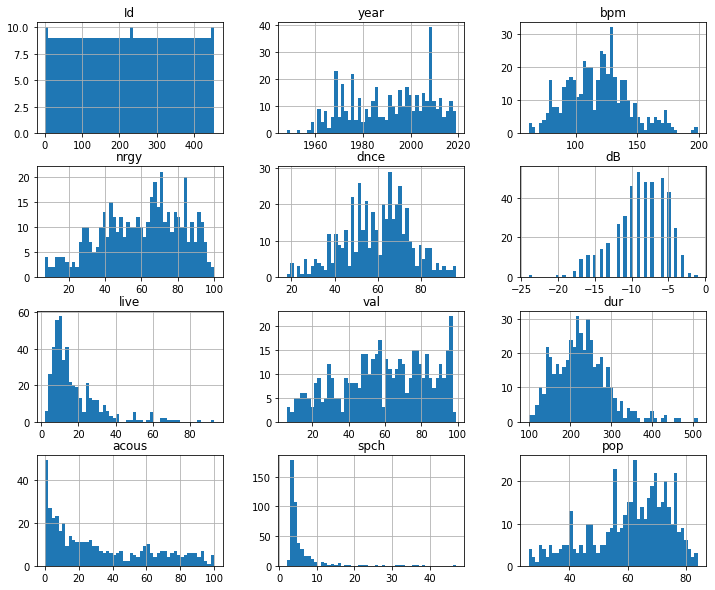

In [136]:
# The distribution of the data was observed to see if it followed a normal distribution; while some followed 
# a normal distribution, other features were skewed. 
# As the train and test set had already been split, no explicit stratified sampling was carried out.

# Plotting the distribution of numerical features
import matplotlib.pyplot as plt
%matplotlib inline
spotify_data.hist(bins=50, figsize=(12,10))
plt.show()

In [10]:
# Assessing the correlation between features in the dataset
spotify_data.corr()


# There was no multicollinearity between attributes as the highest observed correlation was 0.687 and this was 
# between dB and energy levels. The highest correlation with the target attribute was 0.36 from the duration 
# attribute and -0.46 from the acoustic attribute.

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,1.000000,-0.027718,0.055114,0.043105,0.043052,-0.025988,-0.035120,0.042832,0.061114,-0.071105,0.084924,0.086837
year,-0.027718,1.000000,-0.039243,0.122396,0.224497,0.291471,-0.000011,-0.025627,-0.045699,-0.127588,0.186732,-0.054293
bpm,0.055114,-0.039243,1.000000,0.227551,-0.009167,0.103372,0.017632,0.152745,0.025603,-0.222571,0.051271,0.055024
nrgy,0.043105,0.122396,0.227551,1.000000,0.348121,0.683883,0.096633,0.422263,0.179608,-0.662268,0.205850,0.303797
dnce,0.043052,0.224497,-0.009167,0.348121,1.000000,0.254994,-0.084432,0.475557,0.115310,-0.396887,0.240809,0.258670
dB,-0.025988,0.291471,0.103372,0.683883,0.254994,1.000000,0.081476,0.158665,0.100780,-0.457386,0.229775,0.316854
live,-0.035120,-0.000011,0.017632,0.096633,-0.084432,0.081476,1.000000,0.070931,-0.105701,-0.023418,0.088667,-0.051364
val,0.042832,-0.025627,0.152745,0.422263,0.475557,0.158665,0.070931,1.000000,-0.146161,-0.254956,0.084586,-0.018713
dur,0.061114,-0.045699,0.025603,0.179608,0.115310,0.100780,-0.105701,-0.146161,1.000000,-0.284181,0.098079,0.363266
acous,-0.071105,-0.127588,-0.222571,-0.662268,-0.396887,-0.457386,-0.023418,-0.254956,-0.284181,1.000000,-0.208819,-0.465875


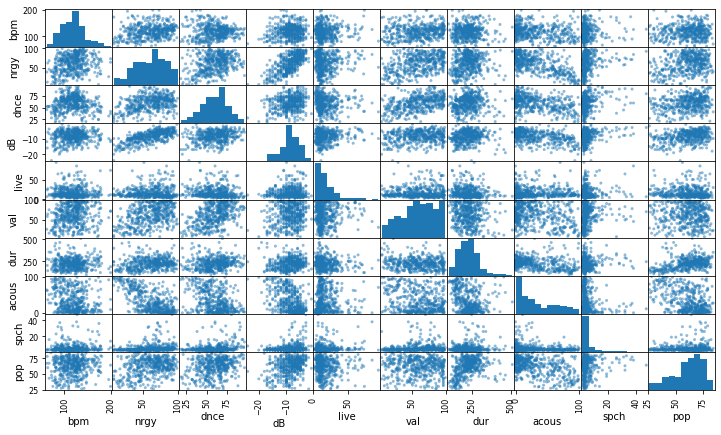

In [11]:
# Pictorial view of correlation and data distribution
from pandas.plotting import scatter_matrix
attributes = ["bpm", "nrgy", "dnce",
              "dB",'live','val','dur','acous','spch','pop']
scatter_matrix(spotify_data[attributes], figsize=(12,7))
plt.show()

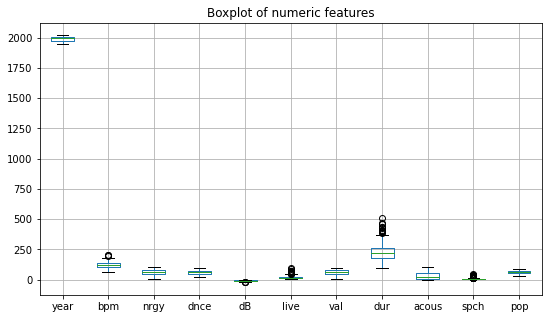

In [137]:
plt.figure(figsize = (9, 5))
spotify_data.iloc[:, 2:].boxplot()

plt.title('Boxplot of numeric features', fontsize = 'large')
plt.show()

# There are outliers in duration, speech, live, bpm and dB features as shown in the boxplots

In [13]:
# Removing the categorical values before building a model

# Dropping 'top genre' column drops the missing values as a result
X = spotify_data.drop(columns = ['title','top genre','artist','pop', 'Id'])

In [14]:
X.shape

(453, 10)

In [15]:
y = spotify_data.iloc[:,[-1]]
y = y.values.ravel()

In [16]:
y.shape

(453,)

In [150]:
# Importing the test data
spotify_test_data = pd.read_csv("/Users/admin/CS98XRegressionTest.csv")

In [151]:
#Checking for null values in the test data
spotify_test_data.isnull().sum()

Id           0
title        0
artist       0
top genre    1
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64

In [148]:
# Replacing null value with the mode of top genre to prevent data loss

genre_mode = str(spotify_test_data['top genre'].mode())

spotify_test_data = spotify_test_data.fillna(value = genre_mode)

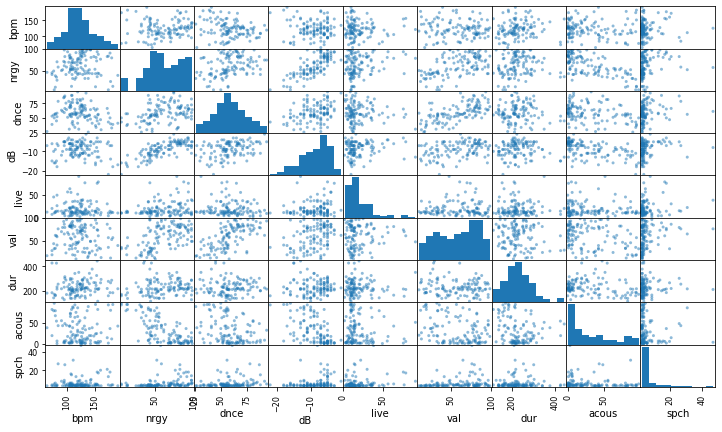

In [104]:
# Data distribution in the test set
attributes = ["bpm", "nrgy", "dnce",
              "dB",'live','val','dur','acous','spch']
scatter_matrix(spotify_test_data[attributes], figsize=(12,7))
plt.show()

In [22]:
# Dropping the categorical values in the test data as we did in the train set
X_test = spotify_test_data.drop(columns = ['title','top genre','artist', 'Id'])

In [23]:
X_test.shape

(114, 10)

In [24]:
# Scaling the train data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

# Scaling the X_test data 
std_scaler = StandardScaler()
X_scaled_test = std_scaler.fit_transform(X_test)

### Section 2 - Model Building and Selection 

#### Baseline Model - Linear Regression 


>Linear Regression was chosen to be the baseline because it is a supervised algorithm that predicts the target value. Of all the regression algorithms, this provided a good base because it is very versatile and can help to explain the relationship between features. The strength of relationship between variables and its significance can be understood from this model. 
The average train RMSE was 11.07 and the predicted values had a lower RMSE of 8.77. Upon fitting the model and observing the error, we began exploring ways to minimize it.

In [25]:
# Calling the linear regression model function and passing in the train set
lin_reg, linreg_rmse = perform_linear_regression(X_scaled, y, k =10)

# RMSE errors for the fit and the average RMSE over 10 folds. This gives an estimate of the model's performance
print(linreg_rmse)

(array([12.47749714, 11.3791127 , 10.83224374,  9.04117877, 11.06215219,
       13.63744494, 10.89685874, 10.88848888, 11.7992471 ,  8.66775112]), 11.068197530815143)


In [26]:
# print(lin_reg.score(X,y)) #r-squared score
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-2.65419026 -0.1737649  -1.36744646  2.50700338  3.19362226 -0.29261232
 -2.27103617  2.63534858 -4.90203839  0.14645073]
60.74392935982341


##### Linear Regression Predictions

In [27]:
# Predicting the test values
linear_predictions = lin_reg.predict(X_scaled_test)

# Creating the excel file
copy = X_test.copy()
copy['Id'] = spotify_test_data['Id'].to_numpy()
copy["pop"] = linear_predictions

predicted_values = copy[["Id", "pop"]]
predicted_values.to_csv('lin_predictions_.csv',index=False)

# The test data had an rmse of 8.76855

In [29]:
# Evaluating the feature importance for this model
# Converting column names to list
column_names = X.columns.values.tolist()

# get importance of features
linreg_importance = lin_reg.coef_

# summarize feature importance
for i,v in enumerate(linreg_importance):
    print(column_names[i], v)

year -2.6541902553195045
bpm -0.17376489715123367
nrgy -1.3674464601258631
dnce 2.507003375022863
dB 3.193622261486334
live -0.2926123177545171
val -2.271036172754262
dur 2.6353485828002654
acous -4.902038394953927
spch 0.14645072590166372


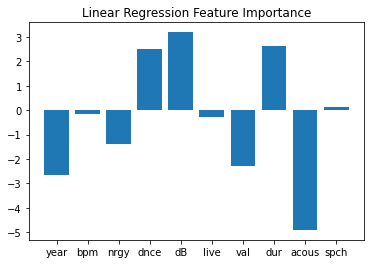

In [32]:
# Plot of linear regression feature importance
plt.bar([column_names[x] for x in range(len(linreg_importance))], linreg_importance)
plt.title('Linear Regression Feature Importance')
plt.show()

#### Model 1: Random Forest



>Random forest is an ensemble algorithm of decision trees that is trained via bagging and introduces more randomness in the data. It works by seacrhing for the best feature among a random subset of features when splitting a node. This model was chosen because it handles outliers well and can work on non-linear features too. Upon cross validation, the average train RMSE was 10.755 and the test error was 8.15. As this produced a lower RMSE, it shows that the model generalises well and does not overfit the data. 

In [33]:
# Random forest regressor function
rnd_reg, rnd_reg_rmse = perform_random_forest(X, y, k=10, n_estimators= 100, max_leaf_nodes=10, n_jobs=-1)
print(rnd_reg_rmse)

(array([12.30223787, 10.40573119, 10.08267651,  9.95712158, 10.38295321,
       11.38072107, 10.38976888, 10.91771893, 11.92660711,  9.80634678]), 10.755188312202277)


##### Random Forest Predictions

In [34]:
# Predicting the test values
rnd_reg_predictions = rnd_reg.predict(X_test)

# Adding the predicted values to X_test and exporting to a cs
copy = X_test.copy()
copy['Id'] = spotify_test_data['Id'].to_numpy()
copy["pop"] = rnd_reg_predictions

predicted_values = copy[["Id", "pop"]]
predicted_values.to_csv('rndreg_predictions_.csv',index=False)

# Had an RMSE test error of 8.15222

In [36]:
# Feature importance of random forest 
features_rndfor = pd.DataFrame({"Feature names": X.columns, "Importance":rnd_reg.feature_importances_})

features_rndfor.sort_values(by = "Importance", ascending = False)

,Feature names,Importance
7,dur,0.552123
0,year,0.148968
8,acous,0.079810
2,nrgy,0.077031
4,dB,0.056987
1,bpm,0.028164
9,spch,0.017708
3,dnce,0.014448
6,val,0.014368
5,live,0.010393


Text(0.5, 1.0, 'Random Forest Feature Importance')

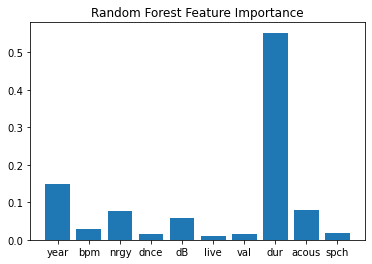

In [37]:
plt.bar(X.columns, rnd_reg.feature_importances_)
plt.title('Random Forest Feature Importance')
plt.show()

#### Model 2: Ensemble Learning (Voting Regressor)

>The first ensemble learning that was tried was a VotingRegressor that involved the combination of Linear Regression, SVR and Random Forest. The train and test error was quite high which can be attributed to SVR which was the weakest estimator. Another iteration that excluded SVR was carried out and this gave a test RMSE of about 7.95729 and an average train RMSE of 10.458. This was an improvement on the RandomForest predictions.

<!-- Lastly, when Decision Trees and Random Forest were combined, the error reduced slightly which gave the best model overall. -->

In [38]:
# Instantiate estimators and incorporate these into a voting regressor
linreg_ = LinearRegression()
rndfor_reg = RandomForestRegressor(random_state=42)

In [39]:
voting_reg, voting_rmse = perform_ensemble(X_scaled, y, linreg_, rndfor_reg, k= 10)
print(voting_rmse)

(array([11.86807385, 10.44782163, 10.12740605,  8.6096886 , 10.71039949,
       12.12488779, 10.11598296, 10.25392978, 11.53982737,  8.77903292]), 10.457705042713343)


In [40]:
# Predicting the test values
voting_reg_predictions = voting_reg.predict(X_scaled_test)

In [42]:
# Adding the predicted values to X_test and exporting to a cs
copy["pop"] = voting_reg_predictions

predicted_values = copy[["Id", "pop"]]
predicted_values.to_csv('vot_reg_predictions_.csv',index=False)

# Had a test RMSE of 7.95729

In [98]:
# Option 2
# Instantiate estimators and incorporate these into a voting regressor
dectree_ = DecisionTreeRegressor(max_depth =3)
rndfor_reg = RandomForestRegressor(min_samples_leaf = 3, max_depth =7, n_jobs = -1)

voting_reg2, voting_rmse = perform_ensemble(X_scaled, y, dectree_, rndfor_reg, k= 10)
print(voting_rmse)

# Predicting the test values
voting_pred = voting_reg2.predict(X_scaled_test)

# Adding the predicted values to X_test and exporting to a cs
copy["pop"] = voting_pred

predicted_values = copy[["Id", "pop"]]
predicted_values.to_csv('voterreg_predictions_.csv',index=False)

# Had a test RMSE of 8.88012

(array([12.56827624, 10.38766066, 10.11386091, 10.15156099, 10.86639613,
       11.21487105, 10.21318341, 10.69101636, 11.98569689,  9.66465833]), 10.785718098812954)


### Section 3 - Feature Selection and Reduction 

#### Feature Reduction 

>The training dataset which consisted of 10 variables (after dropping the categorical values) was examined to see if reducing the dimensionality would help improve the model's fit. Principal Component Analysis (PCA) which projects data onto a lower dimensional hyperplane to reduce the dimensions was selected for this. 

In [59]:
# Principal Component Analysis
pca = PCA(n_components = 8, random_state= 45)
pca.fit(X_scaled)

# The resulting variables from PCA are linear combinations of original variables. However, the inputs need to be 
# scaled so as to give the right weights to all attributes. 

pca_x = pca.transform(X_scaled)
pca_x_test = pca.transform(X_scaled_test)

In [60]:
# In order to preserve the largest variance of the dataset, it was important to specify number of components 
# that provided this.  

# Getting to know the total explained variance by these features
print('Explained variance:', pca.explained_variance_)

# print(pca.explained_variance_ratio_)
print('Cumsum explained variance:', pca.explained_variance_ratio_.cumsum())

# Reducing the components reduced the explained variance significantly, so a value of 8 components was chosen as this 
# gives 94.25% variance.

Explained variance: [2.96956531 1.24703872 1.2024864  1.1199272  0.91406379 0.87232702
 0.66667055 0.45426561]
Cumsum explained variance: [0.296301   0.42072959 0.54071278 0.65245827 0.74366287 0.83070301
 0.89722289 0.94254917]


In [67]:
# Instantiate the RandomForestRegressor
randomregr = RandomForestRegressor(n_estimators= 50, max_leaf_nodes=18, n_jobs=-1, random_state = 42)
randomregr.fit(pca_x, y)

cross_validate(randomregr, pca_x, y, k=10)

(array([11.4758807 , 10.24612795,  9.86893509, 10.3136346 , 11.05849244,
        14.13873972, 11.525535  , 12.21196469, 12.10598488,  9.94970133]),
 11.289499640075793)

In [68]:
pca_rnd_pred = randomregr.predict(pca_x_test)

In [70]:
# Adding the predicted values to X_test and exporting to a cs
copy["pop"] = pca_rnd_pred

pca_predicted_values = copy[["Id", "pop"]]
pca_predicted_values.to_csv('pca_predictions.csv',index=False)

# Had a test rmse of 8.03337

# Upon reducing the features, we fit this using a RandomForestRegressor (the top performing individual estimator), 
# but the test error was higher than that of the Voting Regressor, hence, this model was not selected. 


#### Feature Selection

>Also, we explored the concepts of selecting only relevant features needed to build a good model. In order to gain a comprehensive understanding of this importance (irrespective of the model), we used a Correlation feature selection technique that is based on Pearson's correlation. 

In [106]:
# Importing SelectKbest to select specified number of features 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

columns = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',  'acous',  'spch']

# This function takes in a value, k which represents the number of top features to be returned.
# The top feature is gotten by utilizing correlation statistics. In other words, by measuring how 
# correlated each feature is to the target value. It returns a dataframe with selected features

def select_k_best_features(X, k = 10):
    fs = SelectKBest(score_func=f_regression, k=k)
    fs.fit(X, y)
    X_fs = fs.transform(X)
    
    # The following returns the features with the k highest correlation to the target variable
    mask = fs.get_support()
    new_features = []

    for bool, feature in zip(mask, columns):
        if bool:
            new_features.append(feature)
            
    fs_df = pd.DataFrame(X_fs, columns=new_features)

    return (fs, fs_df)

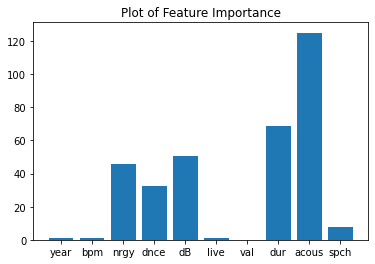

In [73]:
# Pearson's Correlation feature importance
fs, feature_df = select_k_best_features(X)

plt.bar([columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.title('Plot of Feature Importance')
plt.show()

In [107]:
_, rmse = perform_ensemble(X, y, linreg_, rndfor_reg, k=10)
rmse

(array([12.01875343, 10.40205763, 10.04881883,  8.93891664, 10.64867595,
        12.09787019, 10.1479782 , 10.27822301, 11.39705718,  8.8158392 ]),
 10.479419024347992)

In [111]:
# Comparing using Linear Regression on all features/selected features using correlation coefficient 
dectreereg_ = DecisionTreeRegressor()
linear_regression_rmses = []
random_forest_rmses = []
ensemble_rmses = []

x_axis = list(range(1, X.shape[1] + 1))

for k in range(1, X.shape[1] + 1):
    _, X_fs = select_k_best_features(X, k)
    
    _, (_, linear_regression_rmse) = perform_linear_regression(X_fs, y)
    linear_regression_rmses.append(linear_regression_rmse)
    
    _, (_, random_forest_rmse) = perform_random_forest(X_fs, y)
    random_forest_rmses.append(random_forest_rmse)
    
    _, (_, ensemble_rmse) = perform_ensemble(X_fs, y, linreg_, rndfor_reg)
    ensemble_rmses.append(ensemble_rmse)

In [109]:
print('Linear Regression RMSEs:', linear_regression_rmses)
print('Random Forest RMSEs:', random_forest_rmses)
print('Ensemble RMSEs:', ensemble_rmses)

Linear Regression RMSEs: [11.907779075911908, 11.543749775961897, 11.443887730274797, 11.411992869445516, 11.369110950085382, 11.398026121727229, 11.413012533227658, 11.21966974169103, 11.225020964125367, 11.068197530815144]
Random Forest RMSEs: [13.252065258773257, 11.969751505514642, 11.605168840751984, 11.264735122191771, 11.330678304174665, 11.230481490538608, 11.211996939223626, 10.471991976388924, 10.617492775876526, 10.722418125513883]
Ensemble RMSEs: [12.93322213758266, 12.667401447575084, 12.613654262304056, 12.503784523037789, 12.558658660981937, 12.639255246725142, 12.488933139265223, 11.378962731826801, 11.762123679672058, 11.691043974460618]


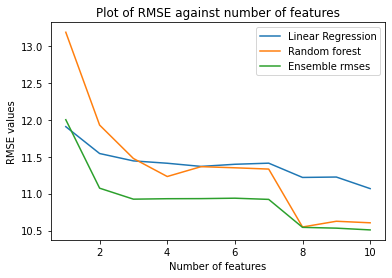

In [132]:
# Include what X and Y axis are
# Recent run
# Number of features vs RMSE
plt.plot(x_axis, linear_regression_rmses, label = 'Linear Regression')
plt.plot(x_axis, random_forest_rmses, label = 'Random forest')
plt.plot(x_axis, ensemble_rmses, label = 'Ensemble rmses')
plt.title('Plot of RMSE against number of features')
plt.xlabel('Number of features')
plt.ylabel('RMSE values')
plt.legend(loc="upper right")

# It was interesting to note that as the number of correlated features increased, the RMSE reduced across all models. 
# In other words, as the number of selected features increased from 1 to 10, the error decreased. 
# This resonated with the observation from the Feature Reduction Technique - changing the features did not have 
# tremendous difference in the model's fit. From these two methods, it was decided to leave the features as they 
# were as that gave a better performance. 

### Section 4 - Hyperparameter tuning - GridSearchCV

>Several models include parameters that need to be tuned in order to generate a model that can fit the train data and make accurate predictions. Going over this manually can be cumbersome, hence a scikit-learn function called GridSearchCV. GridSearchCV explores a range of parameters and finds the best-performing parameter combination according to a scoring method. This was used to determine the best features in selecting models. 

#### Model 3 - GradientBoost with GridSearchCV

In [80]:
# Importing GridSearch and a boosting ensemble
from sklearn.model_selection import GridSearchCV

# GradientBoost works by sequentially adding predictors to an ensemble that was made by a previous regressor
# It tries to improve its predictions by predicting on the residuals of predecessors

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [81]:
parameters = {'learning_rate': [0.01,0.03,0.1], 'subsample'    : [0.9, 0.6, 0.4, 0.2],'n_estimators' : [50, 100,500],
                  'max_depth'    : [2, 4,6,8]
                }

In [82]:
grid_gbr = GridSearchCV(estimator= GBR, param_grid = parameters,  cv = 10, n_jobs=-1, scoring = 'neg_root_mean_squared_error')
grid_gbr.fit(X, y)


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.1],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 500],
                         'subsample': [0.9, 0.6, 0.4, 0.2]},
             scoring='neg_root_mean_squared_error')

In [83]:
print("Grid search results" )
print("\n The best estimator is:\n",grid_gbr.best_estimator_)
print("\n The best score is:\n",grid_gbr.best_score_)
print("\n The best parameters are:\n",grid_gbr.best_params_)

Grid search results

 The best estimator is:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.6)

 The best score is:
 -10.445677950018588

 The best parameters are:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.6}


In [113]:
grid_gbrt = GradientBoostingRegressor(learning_rate = 0.01, subsample = 0.6, n_estimators = 500, max_depth = 4,
                                      random_state = 31)

grid_gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=31, subsample=0.6)

In [116]:
# Training set error
cross_validate(grid_gbrt, X,y, k=10)


(array([11.42941621, 10.53632323,  9.88803136,  9.86161553, 10.83199567,
        11.74599247,  9.89078938, 10.59791653, 11.67006264,  9.24912253]),
 10.570126555155507)

In [114]:
# Make a prediction on test set
predicted_gbrt = grid_gbrt.predict(X_test)

# Adding the predicted values to X_test and exporting to a csv
copy["pop"] = predicted_gbrt

predicted_gbrt_values = copy[["Id", "pop"]]

predicted_gbrt_values.to_csv('gboost.csv',index=False)

# Test error was 7.69685

# We also fit a RandomForestRegresor after performing a grid search and this gave a test RMSE of 7.92378.
# As the gradientboost performed better, this was not selected to be the final model.

# GradientBoost was selected as our last model as it gave the lowest test error of 7.697 and the average training 
# RMSE was low.

##### Other Model Performances

We used kFold cross-validation(CV) because of the distribution of the dataset. A model is trained using 'k-1' folds and this is validated on the withheld fold. The results are the average of the specified score. Overall, this gives a better performance measure of the model. Upon fitting several models, RandomForestRegression gave the overall best score. This can be attributed to the fact that this is an ensemble method of decision trees.

The Linear Regression model was optimised using Stochastic Gradient, but this did not cause much changes. It slightly increased the model error. This may be attributed to partial or non-conformity of the datapoints to the linear regression assumptions. An assumption that could be flawed was that of linearity. This is seen in the scatterplot which shows that the data is not completely linear.

To confirm this, we tried the Support Vector Regression (SVR) model and this was not a good fit. This was for both the linear and the poly kernel SVR. The dataset was scaled using StandardScaler because of the sensitivity of the model. However, it was observed that as the tolerance margin, epsilon (E) was changed, the resulting difference varied. Increasing E slightly reduced the error, but a rapid increase affected the error. This was also the same for decreasing E. This can be attributed to the distribution of the datapoints.

Decision tree regressor was also used, but since there are limitations to it and it is prone to overfitting, it did not give a good fit. An ensemble of it was also examined and Random Forest Regressor performed better because it is a combination of trees that search for the best feature among a random subset of features.

### Section 4 - Encoding of Categorical Variables

In [125]:
# To conclude, we explored encoding of categorical variables. There were 3 of this in total - title, artist 
# and top genre. In reality, the artist plays a key role in the popularity of a song. However, 
# it was not feasible to encode this as both the title and artist features had over 400 unique features.

# The top genre column was split into sub-categories before it was encoded using scikit dummy variables. 
# This was fit to the existing models to see if there would be any performance gains.

# Showing the top 10 top genres 
spotify_data['top genre'].value_counts().nlargest(10)

adult standards       68
album rock            66
dance pop             61
glam rock             16
brill building pop    16
europop               14
dance rock            13
boy band              10
british invasion       8
bubblegum dance        7
Name: top genre, dtype: int64

In [ ]:
# Copying the train data into another dataframe
data_copied = spotify_data.copy()
data_copied.head()

In [126]:
# Counting the number of times each top genre appeared
dict = data_copied["top genre"].value_counts().to_dict()

# Getting the value counts greater than 8 (We used 8 as a benchmark)
dict_filtered = {key:val for key, val in dict.items() if val >= 8}

# Classifying the other top genres as 'Other'
data_copied['top genre'] = ['Other' if genre not in dict_filtered else genre for genre in data_copied['top genre']]

In [ ]:
# Encoding 'top genre' using dummy variables
X_tg = data_copied.drop(columns = ['title','artist', 'pop', 'Id'])
X_tg = pd.get_dummies(X_tg)

#### Exploration of performance after encoding 'top genre'

In [162]:
# Baseline Model 
# baseline performance of linear regression using encoded 'top genre'
_, rmse = perform_linear_regression(X_tg, y, k=10)
print(rmse)

# baseline performance of linear regression without encoded values
_,rmse2 = perform_linear_regression(X, y, k=10)
print(rmse2)

(array([11.92669157, 10.8064495 , 10.80355194,  8.41593334, 11.02809125,
       13.99153336, 10.79243654, 10.45890866, 11.43513047,  9.21922523]), 10.887795185606407)
(array([12.47749714, 11.3791127 , 10.83224374,  9.04117877, 11.06215219,
       13.63744494, 10.89685874, 10.88848888, 11.7992471 ,  8.66775112]), 11.068197530815144)


In [164]:
# Model 1
# random forest performance using encoded 'top genre'
_, rndrmse = perform_random_forest(X_tg, y, k=10, max_depth= 8, min_samples_leaf= 8, 
                               min_samples_split=5, n_estimators= 100)
print(rndrmse)

# random forest performance without encoded values
_,rndrmse2 = perform_random_forest(X, y, k=10, max_depth= 8, min_samples_leaf= 8, 
                                  min_samples_split=5, n_estimators= 100)
print(rndrmse2)

(array([12.12915237, 10.02075541,  9.90379219,  9.56815808, 10.49984963,
       11.29138357, 10.29339393, 10.69597031, 11.52862706,  9.25856241]), 10.518964496607902)
(array([12.41729481, 10.09051177,  9.9496311 ,  9.71415406, 10.5891445 ,
       11.29012398,  9.81147545, 10.76883155, 11.65977994,  9.17507267]), 10.546601980767425)


In [128]:
# Model 2
# voting regressor performance using encoded 'top genre'
_, ensrmse = perform_ensemble(X_tg, y, linreg_, rndfor_reg, k= 10)
print(ensrmse)

# voting regressor performance without encoded values
_,ensrmse2 = perform_ensemble(X, y, linreg_, rndfor_reg, k= 10)
print(ensrmse2)

(array([11.5657817 ,  9.98946711, 10.02447676,  8.45256909, 10.50830814,
       12.25034523, 10.10929371, 10.05937674, 11.12871151,  9.05698395]), 10.314531395122577)
(array([11.90396305, 10.41134824, 10.24978398,  8.85702696, 10.63414437,
       12.2014482 , 10.14293456, 10.32221324, 11.27537922,  8.73220804]), 10.473044987121252)


In [130]:
# Model 3
# gradient boost performance using encoded 'top genre'
_, grdrmse = perform_gradientboost(X_tg,y, k=10, learning_rate = 0.01, subsample = 0.6, n_estimators = 500,
                                      max_depth = 4, random_state = 42)
print(grdrmse)

# gradient boost performance without encoded values
_, grdrmse2 = perform_gradientboost(X,y, k=10, learning_rate = 0.01, subsample = 0.6, n_estimators = 500,
                                      max_depth = 4, random_state = 42)
print(grdrmse2)

(array([11.59091552,  9.61939724,  9.74861034,  9.81616054, 10.81533611,
       11.8657085 ,  9.92994596, 10.30421194, 10.99125432,  8.98004542]), 10.36615858798819)
(array([11.62062709, 10.17639786,  9.77348554,  9.9381782 , 10.87708089,
       11.61275901,  9.99568765, 10.55415629, 11.57671165,  9.08431487]), 10.520939905296059)


> The RMSE with the encoded variables were slightly lower than the ones without across all models. However, we decided to leave the models as they were because the differences were less than 0.2 which is not significant and it might introduce more complexities in the dataset.

## Conclusion

In [119]:
# Package to print the final RMSE values
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [121]:
from tabulate import tabulate

model_perf = [['Logistic Regression', 0.42810, 8.7686], ['Random Forest', 10.7552, 8.1522], 
     ['Voting Regressor', 10.4577, 7.9573], ['Gradient Boost', 10.5701, 7.6969]]

rmse_table = tabulate(model_perf, headers = ['Model type', 'Average Train RMSE', 'Test RMSE'], tablefmt='orgtbl')
print(rmse_table)


| Model type        |   Average Train RMSE |   Test RMSE |
|-------------------+----------------------+-------------|
| Linear Regression |              11.0682 |      8.7686 |
| Random Forest     |              10.7552 |      8.1522 |
| Voting Regressor  |              10.4577 |      7.9573 |
| Gradient Boost    |              10.5701 |      7.6969 |


In conclusion, the selected models were used to predict the popularity value for songs in the test set, after it was uploaded to Kaggle in the specified format. The average train RMSE (Root Mean Squared Error) ranged from a 10.457 to 11.068, and the test RMSE ranged from 7.69 to 8.76. The lowest RMSE was achived by the GradientBoost using GridSearchCV. The GradientBoost performed better in the following:
- It had better performance than the baseline model
- It achieved a low train error and test error, which shows that the model was not over-fitting to the train data and could generalise well


### Future Works/ Recommendation 

From our research, the XGBoost and Stacking are also great ensemble techniques for regression prediction. For further implementation, we could explore these. Also, seeing as the data was imbalanced, we could have tried other advanced regression techniques such as LassoRegression.

Also, it would be great to dive deeper to understand why AdaBoost using Decision Tree did not work well, it gave an exceptionally high RMSE error of about 23.